In [108]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics, preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [6]:
X_train = np.loadtxt('data/train.txt')
X_test = np.loadtxt('data/test.txt')
y_train = np.loadtxt('data/train_labels.txt')
y_test = np.loadtxt('data/test_labels.txt')

In [9]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [10]:
np.shape(X)

(10299, 561)

In [11]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

In [12]:
scale = preprocessing.StandardScaler()
X_scaled = scale.fit_transform(X)
print(np.round(X_scaled[0][0], 2))

0.21


In [44]:
silhouette = []
coef_ch = []
coef_db = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
    kmeans.fit(X_scaled)
    silhouette.append(metrics.silhouette_score(X_scaled, kmeans.labels_))
    coef_ch.append(metrics.calinski_harabasz_score(X_scaled, kmeans.labels_))
    coef_db.append(metrics.davies_bouldin_score(X_scaled, kmeans.labels_))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

<Figure size 1000x500 with 0 Axes>

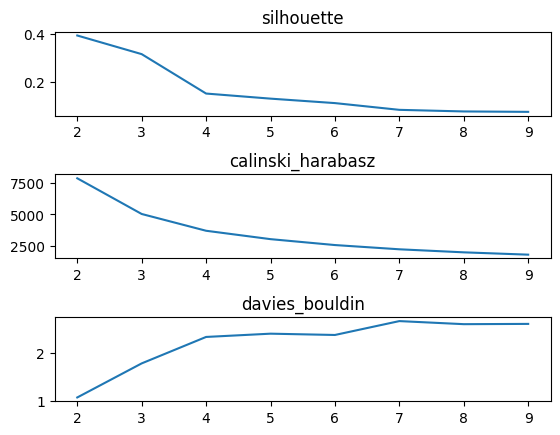

In [45]:
fig = plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(ncols=1, nrows=3)
plt.subplots_adjust(hspace=0.7)
sns.lineplot(x=range(2, 10), y=silhouette, ax=ax[0]).set(title='silhouette')
sns.lineplot(x=range(2, 10), y=coef_ch, ax=ax[1]).set(title='calinski_harabasz')
sns.lineplot(x=range(2, 10), y=coef_db, ax=ax[2]).set(title='davies_bouldin');

In [46]:
print(f'silhouette: {silhouette[0].round(2)}')
print(f'calinski_harabasz: {coef_ch[0].round(2)}')
print(f'davies_bouldin: {coef_db[0].round(2)}')

silhouette: 0.39
calinski_harabasz: 7880.81
davies_bouldin: 1.07


In [49]:
kmeans_6 = KMeans(n_clusters=6, random_state=42, init='random')
kmeans_6.fit(X_scaled)
print(f'homogeneity: {metrics.homogeneity_score(y, kmeans_6.labels_).round(2)}')
print(f'completeness: {metrics.completeness_score(y, kmeans_6.labels_).round(2)}')
print(f'adjusted_rand: {np.round(metrics.adjusted_rand_score(y, kmeans_6.labels_), 2)}')

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


homogeneity: 0.54
completeness: 0.58
adjusted_rand: 0.42


In [52]:
ct = pd.crosstab(y, kmeans_6.labels_)
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [54]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, init='random')
kmeans_2.fit(X_scaled)

ct = pd.crosstab(y, kmeans_2.labels_)
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))
ct

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [55]:
print(f'completeness: {metrics.completeness_score(y, kmeans_2.labels_).round(2)}')

completeness: 0.98


In [57]:
ag = AgglomerativeClustering(n_clusters=2)
ag.fit(X_scaled)
print(f'completeness: {metrics.completeness_score(y, ag.labels_).round(2)}')

completeness: 1.0


# PCA

In [59]:
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())
df_std

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


In [60]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [61]:
# находим собственные числа и собственные вектора
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

In [62]:
eigen_val

array([2.51579324, 1.0652885 , 0.39388704, 0.02503121])

In [72]:
eigen_vectors

array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
       [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
       [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
       [-0.59654663, -0.11593512,  0.44973251,  0.65454704]])

In [71]:
df_std @ eigen_vectors[:, :2]

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


In [74]:
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02,  7.55974765e-01],
       [ 2.55653399e+00, -7.80431775e-01],
       [ 5.14801919e-02,  1.25313470e+00],
       [-1.01415002e+00,  2.38808310e-04],
       [-1.57986086e+00, -1.22891650e+00]])

In [83]:
a = np.matrix('3, 4, 1; 1, 6, 2')
a

matrix([[3, 4, 1],
        [1, 6, 2]])

In [84]:
np.cov(a).sum()

14.333333333333334

In [91]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

# SVD и t-SNE

In [93]:
M = np.matrix([[-1, 1, 0], [-1, -1, 1]])
M

matrix([[-1,  1,  0],
        [-1, -1,  1]])

In [103]:
U = M@M.T
U

matrix([[2, 0],
        [0, 3]])

In [104]:
eigen_val, eigen_vectors = np.linalg.eig(U)
eigen_vectors.round()

matrix([[1., 0.],
        [0., 1.]])

In [106]:
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(X)

In [109]:
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)

array([[-19.350155 , -35.30527  ],
       [-19.653883 ,  -5.1900606],
       [-20.152666 , -22.464697 ],
       ...,
       [ 13.928527 , -16.843653 ],
       [ 13.828104 , -16.859516 ],
       [ 13.80447  , -16.702316 ]], dtype=float32)

ПРАКТИКА: ПОНИЖЕНИЕ РАЗМЕРНОСТИ

In [110]:
data = pd.read_csv('data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [111]:
data['life_expec'].max()

82.8

In [112]:
X = data.drop('country', axis=1)

In [113]:
scale = preprocessing.StandardScaler()
X_norm = scale.fit_transform(X)
print(np.round(X_norm[0][0], 2))

1.29


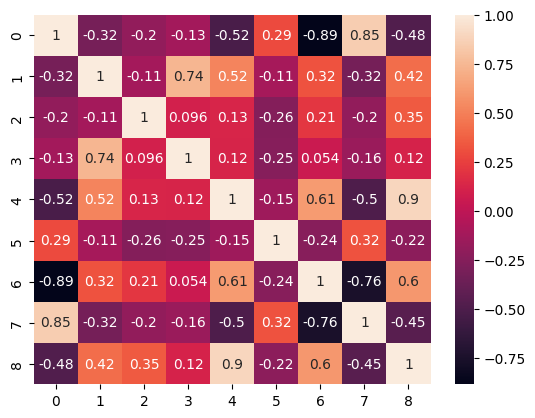

In [125]:
sns.heatmap(np.corrcoef(X_norm.T), annot=True);

In [130]:
pca = PCA(n_components=0.9)
X_opt = pca.fit_transform(X_norm)
X_opt

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [131]:
# какую долю дисперсии объясняет первая главная компонента
np.round(pca.explained_variance_ratio_[0], 2)

0.46

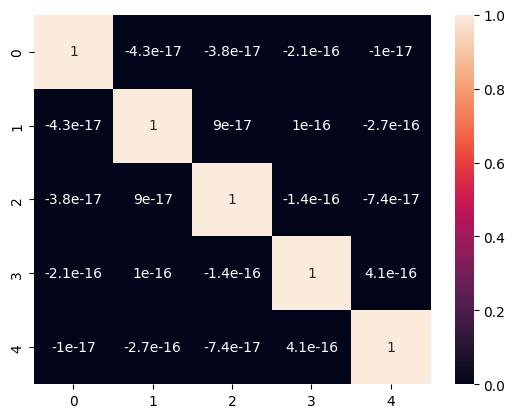

In [132]:
sns.heatmap(np.corrcoef(X_opt.T), annot=True);

In [133]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_opt)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(X_opt, cluster_labels)
    print(i, silhouette_avg)

2 0.3044199499231818
3 0.3079769786519015
4 0.3235154307362653
5 0.3255806324717655
6 0.2671181792769642
7 0.2256950938124907
8 0.24037703530553411
9 0.27436633921353193
10 0.24031234938202223


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

In [134]:
kmeans_4 = KMeans(n_clusters=4, random_state = 1)
kmeans_4.fit(X_opt)
data['cluster'] = kmeans_4.labels_

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
agg_func = {'child_mort': 'max' , 'gdpp': 'min'}
data.groupby('cluster').agg(agg_func)

,child_mort,gdpp
cluster,,
0,6.8,21100
1,64.4,592
2,13.8,19800
3,208.0,231


In [139]:
data[data['cluster'] ==3].sort_values(by='life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,3
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,3
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,3
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,3
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,3
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,3
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,3
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
